In [36]:
# install necessary packages
#
##!pip install matplotlib seaborn tabulate pandas
#!pip install matplotlib
#!pip install seaborn
#!pip install tabulate
##!pip install pandas


# Data Understanding

(This document relates to question number 2)

- What pedagogical strategies developed by teachers seem to promote better reading performance (PISA 2018 - teacher context data)?
- What pedagogical strategies, according to the students' perspective, seem to promote better reading performance (PISA 2018 - student context data)?
- Do teachers and students have the same perceptions?

## **2.1 Collect Initial Data**

For this question we're using 2 datasets (https://www.oecd.org/en/data/datasets/pisa-2022-database.html):
- Students database 2018 (PISA)
- Teachers database 2018 (PISA)

this file only uses the students, for the teacher section see ([Data Understanding - Teacher](./data_understanding_teacher.ipynb))

The source datasets are in .sas7bdat format, that we converted to .csv with the following command:

In [37]:
"""
data = pd.read_sas(
    "../../../databases/2018/cy07_msu_stu_qqq.sas7bdat", format="sas7bdat"
)

data.to_csv("../../../databases/2018/student2018.csv", index=False)

data = pd.read_sas(
    "../../../databases/2018/cy07_msu_tch_qqq.sas7bdat", format="sas7bdat"
)

data.to_csv("../../../databases/2018/only_teacher2018.csv", index=False)
"""

'\ndata = pd.read_sas(\n    "../../../databases/2018/cy07_msu_stu_qqq.sas7bdat", format="sas7bdat"\n)\n\ndata.to_csv("../../../databases/2018/student2018.csv", index=False)\n\ndata = pd.read_sas(\n    "../../../databases/2018/cy07_msu_tch_qqq.sas7bdat", format="sas7bdat"\n)\n\ndata.to_csv("../../../databases/2018/only_teacher2018.csv", index=False)\n'

In [ ]:
import pandas as pd

#student = pd.read_csv('../../../databases/2018/student2018.csv', nrows=1000)
student = pd.read_csv('../../../databases/2018/student2018.csv')

print("Student shape:", student.shape)

**Note:** We don't include these files in the project folder, so it's necessary to manually download and put them in their respective folder.

Because the teachers dataset only has these countries `["b'ALB'" "b'QAZ'" "b'BRA'" "b'CHL'" "b'TAP'" "b'DOM'" "b'DEU'" "b'HKG'"
 "b'KOR'" "b'MAC'" "b'MYS'" "b'MAR'" "b'PAN'" "b'PER'" "b'PRT'" "b'ESP'" "b'ARE'" "b'GBR'" "b'USA'"]` we should remove data from the other countries, so that we can explore the data related to the teacher dataset countries

In [5]:
import pandas as pd

teacher = pd.read_csv('../../../databases/2018/only_teacher2018.csv')
# Filter students

student = student[student['CNT'].isin(teacher['CNT'].unique())]

del teacher # we are analysing the students

In [6]:
print(student['CNT'].unique())
print("Student shape after filter by countries in teacher dataset:", student.shape)

["b'ALB'" "b'QAZ'" "b'BRA'" "b'CHL'" "b'TAP'" "b'DOM'" "b'DEU'" "b'HKG'"
 "b'KOR'" "b'MAC'" "b'MYS'" "b'MAR'" "b'PAN'" "b'PER'" "b'PRT'" "b'ESP'"
 "b'ARE'" "b'GBR'" "b'USA'"]
Student shape after filter by countries in teacher dataset: (171417, 1119)


We can see the difference in the datasets shape after filtering it by country, we now only have ~28% of the rows:
- Student shape **before** filter: (612004, 1119)
- Student shape **before** filter: (171417, 1119)

## **2.2 Describe Data**

The original dataset has 1119 features

In [7]:
student.head()

,CNTRYID,CNT,CNTSCHID,CNTSTUID,CYC,NatCen,STRATUM,SUBNATIO,OECD,ADMINMODE,...,PV4RTML,PV5RTML,PV6RTML,PV7RTML,PV8RTML,PV9RTML,PV10RTML,SENWT,VER_DAT,i
0,8.0,b'ALB',800115.0,800001.0,b'07MS',b'000800',b'ALB0107',b'0080000',0.0,2.0,...,325.281,370.041,358.524,345.833,380.064,357.376,385.496,0.48064,b' 09MAY19:11:20:53',31.0
1,8.0,b'ALB',800300.0,800002.0,b'07MS',b'000800',b'ALB0105',b'0080000',0.0,2.0,...,337.259,294.530,325.444,367.058,333.356,367.616,334.448,1.30666,b' 09MAY19:11:20:54',31.0
2,8.0,b'ALB',800088.0,800003.0,b'07MS',b'000800',b'ALB0101',b'0080000',0.0,2.0,...,297.929,269.282,293.719,314.027,295.519,283.143,315.992,0.67391,b' 09MAY19:11:20:54',31.0
3,8.0,b'ALB',800014.0,800004.0,b'07MS',b'000800',b'ALB0109',b'0080000',0.0,2.0,...,349.369,333.416,320.410,388.597,324.419,372.543,355.213,0.68250,b' 09MAY19:11:20:53',31.0
4,8.0,b'ALB',800294.0,800005.0,b'07MS',b'000800',b'ALB0203',b'0080000',0.0,2.0,...,461.508,464.534,461.681,455.574,430.815,476.752,482.148,0.63579,b' 09MAY19:11:20:53',31.0


In [8]:
student.describe()

,CNTRYID,CNTSCHID,CNTSTUID,OECD,ADMINMODE,LANGTEST_QQQ,LANGTEST_COG,LANGTEST_PAQ,BOOKID,ST001D01T,...,PV3RTML,PV4RTML,PV5RTML,PV6RTML,PV7RTML,PV8RTML,PV9RTML,PV10RTML,SENWT,i
count,171417.000000,1.714170e+05,1.714170e+05,171417.000000,171417.0,169070.000000,171417.000000,51054.000000,171417.000000,171417.000000,...,171417.000000,171417.000000,171417.000000,171417.000000,171417.000000,171417.000000,171417.000000,171417.000000,171417.000000,171417.0
mean,504.555190,5.045665e+07,5.046570e+07,0.468174,2.0,274.796179,281.303138,226.125671,18.891143,10.313493,...,456.664723,456.288465,456.260950,456.352966,456.472832,456.752373,456.432967,456.722792,0.554204,31.0
std,278.328426,2.783394e+07,2.783762e+07,0.498988,0.0,149.842714,169.426706,64.759578,14.797667,6.215216,...,111.355203,111.277149,111.264564,111.040891,111.146036,111.088407,111.044397,111.206005,0.407102,0.0
min,8.000000,8.000020e+05,8.000010e+05,0.000000,2.0,140.000000,140.000000,148.000000,1.000000,7.000000,...,28.710000,56.015000,81.468000,56.622000,65.195000,34.006000,49.858000,91.861000,0.012000,31.0
25%,214.000000,2.140018e+07,2.140468e+07,0.000000,2.0,156.000000,156.000000,156.000000,8.000000,10.000000,...,375.228000,374.660000,374.594000,375.067000,375.143000,375.270000,375.099000,375.000000,0.139170,31.0
50%,604.000000,6.040001e+07,6.040028e+07,0.000000,2.0,232.000000,232.000000,232.000000,16.000000,10.000000,...,456.438000,456.470000,456.598000,456.596000,456.708000,457.142000,456.646000,456.838000,0.608200,31.0
75%,724.000000,7.240095e+07,7.243988e+07,1.000000,2.0,313.000000,313.000000,301.000000,23.000000,10.000000,...,537.741000,537.136000,537.280000,537.173000,537.389000,537.272000,537.759000,537.742000,0.803880,31.0
max,840.000000,8.400018e+07,8.400863e+07,1.000000,2.0,803.000000,991.000000,316.000000,99.000000,96.000000,...,873.625000,847.189000,866.572000,846.357000,852.129000,873.624000,884.818000,907.088000,4.138940,31.0


In [9]:
student.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 171417 entries, 0 to 586850
Data columns (total 1119 columns):
 #     Column        Non-Null Count   Dtype  
---    ------        --------------   -----  
 0     CNTRYID       171417 non-null  float64
 1     CNT           171417 non-null  object 
 2     CNTSCHID      171417 non-null  float64
 3     CNTSTUID      171417 non-null  float64
 4     CYC           171417 non-null  object 
 5     NatCen        171417 non-null  object 
 6     STRATUM       171417 non-null  object 
 7     SUBNATIO      171417 non-null  object 
 8     OECD          171417 non-null  float64
 9     ADMINMODE     171417 non-null  float64
 10    LANGTEST_QQQ  169070 non-null  float64
 11    LANGTEST_COG  171417 non-null  float64
 12    LANGTEST_PAQ  51054 non-null   float64
 13    BOOKID        171417 non-null  float64
 14    ST001D01T     171417 non-null  float64
 15    ST003D02T     171417 non-null  float64
 16    ST003D03T     171417 non-null  float64
 17    ST004D01T  

Key codes with description

In [10]:
import sys
import os

# Add the src directory to the Python path
sys.path.append(os.path.abspath('../../../src')) # Add the src directory to the Python path

from pisadatamap.pisadatamap import PISADataMap

data_map = PISADataMap('../../../databases/2018/student_data_structure_2018.csv')

for column in data_map.map_enum:
    print(f"\033[1m{column.name}\033[0m: {column.value}")

CNTRYID: Country Identifier
CNT: Country code 3-character
CNTSCHID: Intl. School ID
CNTSTUID: Intl. Student ID
CYC: PISA Assessment Cycle (2 digits + 2 character Assessment type - MS/FT)
NatCen: National Centre 6-digit Code
STRATUM: Stratum ID 7-character (cnt + region ID + original stratum ID)
SUBNATIO: Adjudicated sub-region code 7-digit code (3-digit country code + region ID + stratum ID)
OECD: OECD country
ADMINMODE: Mode of Respondent
LANGTEST_QQQ: Language of Questionnaire
LANGTEST_COG: Language of Assessment
LANGTEST_PAQ: Language of Assessment (PAQ)
BOOKID: Form Identifier
ST001D01T: Student International Grade (Derived)
ST003D02T: Student (Standardized) Birth - Month
ST003D03T: Student (Standardized) Birth -Year
ST004D01T: Student (Standardized) Gender
ST005Q01TA: What is the <highest level of schooling> completed by your mother?
ST006Q01TA: Does your mother have this qualification? <ISCED level 6> (incl. higher qualifications at level 5A in some countries)
ST006Q02TA: Does yo

The dataset is composed by 1103 numeric columns and only 16 categorical columns.


In [11]:
import pandas as pd

categorical_columns = student.select_dtypes(include=["object", "category"]).columns
numeric_columns = student.select_dtypes(include=["int64", "float64"]).columns

column_types_df = pd.DataFrame(
    {
        "Column type": ["Numeric", "Categorical"],
        "Number of columns": [len(numeric_columns), len(categorical_columns) ],
    }
)

print(column_types_df)

   Column type  Number of columns
0      Numeric               1103
1  Categorical                 16


Summarize the unique values to analise uniqque categories by feature, check missing values and description of the features:
1. Numeric
2. Categorical

In [12]:
# 1. Resumo da distribuição de numeric
def summarize(dataframe, type, data_map):
    summary = {}

    for col in dataframe.select_dtypes(include=type).columns:
        value_counts = dataframe[col].value_counts()
        missing = dataframe[col].isnull().sum()
        unique = dataframe[col].nunique()

        summary[col] = {
            'Unique Categories': unique,
            'Top Categories': value_counts.head(5).to_dict(),
            'Missing Values': missing,
            'Percentage Missing': round((missing / len(dataframe)) * 100, 2),
            'Description': data_map.map_enum[col].value if col in data_map.map_enum.__members__ else "No Description"
        }

    return pd.DataFrame.from_dict(summary, orient='index')

Due to githubfile  size limitation, we put these result in  "../../../databases/2018/student_numeric_summarize.csv" , to view see "sumarize_student_numeric.ipynb"

In [13]:
# 1. Numeric
numeric_summary = summarize(student,["int64", "float64"], data_map)
numeric_summary.to_csv("../../../databases/2018/student_numeric_summarize.csv", index_label=False)

del numeric_summary

In [14]:
# 2. Categorical
categorical_summary = summarize(student, ['object'], data_map)
categorical_summary.style

,Unique Categories,Top Categories,Missing Values,Percentage Missing,Description
CNT,19,"{""b'ESP'"": 35943, ""b'ARE'"": 19277, ""b'GBR'"": 13818, ""b'BRA'"": 10691, ""b'CHL'"": 7621}",0,0.000000,Country code 3-character
CYC,1,"{""b'07MS'"": 171417}",0,0.000000,PISA Assessment Cycle (2 digits + 2 character Assessment type - MS/FT)
NatCen,20,"{""b'072400'"": 35943, ""b'078400'"": 19277, ""b'082700'"": 10820, ""b'007600'"": 10691, ""b'015200'"": 7621}",0,0.000000,National Centre 6-digit Code
STRATUM,352,"{""b'DEU9797'"": 5451, ""b'HKG0002'"": 4714, ""b'QAZ0204'"": 4707, ""b'MYS0101'"": 4684, ""b'PER0101'"": 4008}",0,0.000000,Stratum ID 7-character (cnt + region ID + original stratum ID)
SUBNATIO,20,"{""b'7240000'"": 35943, ""b'7840000'"": 19277, ""b'8260000'"": 10820, ""b'0760000'"": 10691, ""b'1520000'"": 7621}",0,0.000000,Adjudicated sub-region code 7-digit code (3-digit country code + region ID + stratum ID)
ST011D17TA,41,"{""b'0724001'"": 31623, ""b'0784001'"": 13994, ""b'0076001'"": 7857, ""b'0827001'"": 7818, ""b'9999999'"": 6966}",0,0.000000,In your home:
ST011D18TA,41,"{""b'0724001'"": 30204, ""b'0784001'"": 13492, ""b'0827001'"": 8662, ""b'9999999'"": 7206, ""b'0076001'"": 7110}",0,0.000000,In your home:
ST011D19TA,39,"{""b'0724001'"": 25703, ""b'0784001'"": 13815, ""b'9999999'"": 13754, ""b'0724002'"": 9501, ""b'0076001'"": 8698}",0,0.000000,In your home:
OCOD1,580,"{""b'9701'"": 32378, ""b'9999'"": 15388, ""b'9705'"": 4139, ""b'2330'"": 3933, ""b'2221'"": 3777}",0,0.000000,ISCO-08 Occupation code - Mother
OCOD2,590,"{""b'9999'"": 17683, ""b'9705'"": 6367, ""b'8322'"": 4368, ""b'5221'"": 3655, ""b'8332'"": 3578}",0,0.000000,ISCO-08 Occupation code - Father


## 2.3 Explore data

The question to explore:
 - What pedagogical strategies, according to the students' perspective, seem to promote better reading performance (PISA 2018 - student context data)?

The target variable in this analysis is the reading scores achieved by each student.

This score is calculated as the average of the values across all "Possible Reading Value" columns, which are represented in the dataset as PV1READ to PV10READ. These features are plausible values, each representing multiple estimates of the student's performance. Averaging them provides a more reliable and comprehensive measure of the student's grade.


We can observe that there are a total of 612004 students, from which ~17% are repeating.


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

"""
Setup average reading scores
"""

from columns_list_q2 import (
    reading_columns,
    get_avg_results,
    drop_columns
)

student = get_avg_results(student, reading_columns, "Reading", None)

In [16]:
student = drop_columns(student)

In [17]:
student["Avg Reading Result"].describe()

count    171417.000000
mean        453.152536
std         105.212165
min         146.682000
25%         375.958700
50%         453.312200
75%         530.968100
max         816.440600
Name: Avg Reading Result, dtype: float64

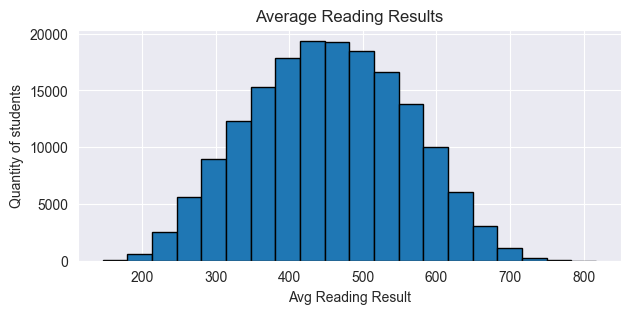

In [18]:
plt.figure(figsize=(7, 3))
plt.hist(student["Avg Reading Result"], bins=20, edgecolor='black')
plt.title("Average Reading Results")
plt.ylabel("Quantity of students")
plt.xlabel("Avg Reading Result")
plt.show()

Categorize reading results:

Number of students by grade category:
Best Performance (70-100%):  686
Neutral (50-69%):  58383
Worst Performance (70-100%):  112348


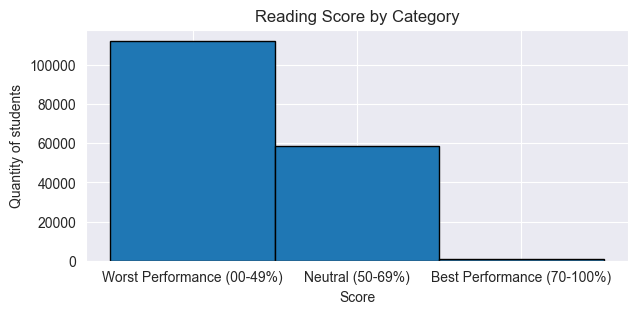

In [19]:
def categorize_reading_score(score):
    score = score/10
    if 70 <= score <= 100:
        return 2
    elif 50 <= score < 70:
        return 1
    elif 0 <= score < 50:
        return 0

student['Reading Score Category'] = student['Avg Reading Result'].apply(categorize_reading_score)

print("Number of students by grade category:")
print("Best Performance (70-100%): ", len(student[student['Reading Score Category']==2]))
print("Neutral (50-69%): ", len(student[student['Reading Score Category']==1]))
print("Worst Performance (70-100%): ", len(student[student['Reading Score Category']==0]))

# Drop rows where 'Reading Score Category' is missing
student_cleaned = student.dropna(subset=['Reading Score Category'])

import matplotlib.pyplot as plt

# Assuming student_cleaned is your DataFrame and the column exists
plt.figure(figsize=(7, 3))
plt.hist(student_cleaned["Reading Score Category"], bins=[0, 1, 2, 3], edgecolor='black', align='left')
plt.title("Reading Score by Category")
plt.ylabel("Quantity of students")
plt.xlabel("Score")
plt.xticks([0, 1, 2], ['Worst Performance (00-49%)', 'Neutral (50-69%)', 'Best Performance (70-100%)'])
plt.show()

del student_cleaned


Amount of students in score category by country, could be interesting to analise, from this analisis we see spain with a bigger amount of students, we could see further the analisis of spain and the iberian peninsula, with portugal and spain mixed together.

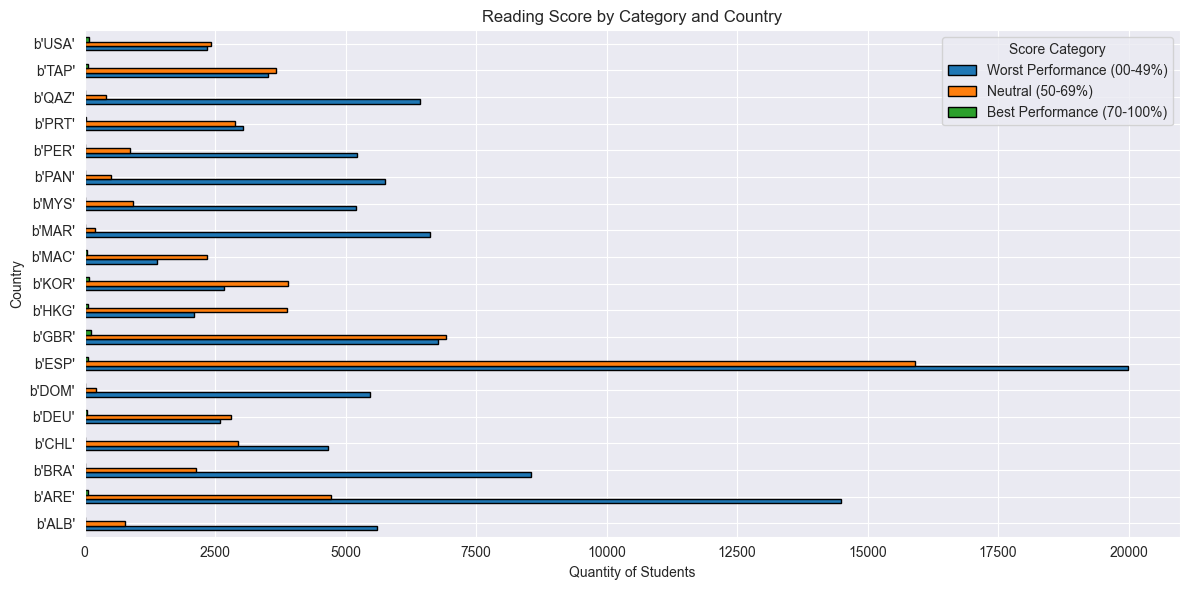

In [20]:
# Criar uma tabela dinâmica para contar o número de estudantes por categoria de desempenho e país
pivot_df = student.pivot_table(index='CNT', columns="Reading Score Category", aggfunc='size', fill_value=0)

# Renomear colunas para melhor legibilidade
pivot_df.columns = ['Worst Performance (00-49%)', 'Neutral (50-69%)', 'Best Performance (70-100%)']

# Criar gráfico de barras horizontais
pivot_df.plot(kind='barh', figsize=(12, 6), edgecolor='black')

# Adicionar título e rótulos
plt.title("Reading Score by Category and Country")
plt.xlabel("Quantity of Students")
plt.ylabel("Country")
plt.legend(title="Score Category")
plt.tight_layout()

# Mostrar o gráfico
plt.show()


Because there are almost no students in the top plausible values, we decided to change approach and instead of looking for the plausible score, we're going to analise by student classification between each other


Number of students by classification
Very Good (90-100%):  51426
Sufficient (50-69%):  34283
Insufficient (0-49%):  85708


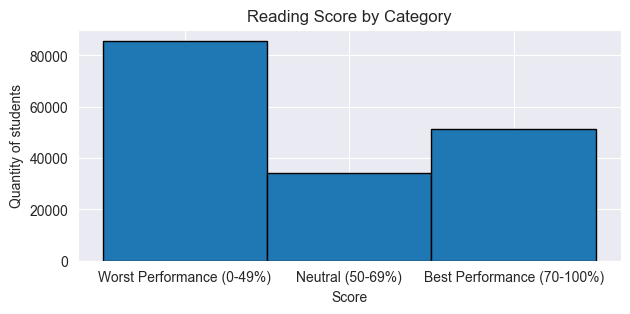

In [21]:
def categorize_reading_students_by_performance(df):
    # Sort the DataFrame by 'Avg Reading Result' in descending order
    df = df.sort_values(by='Avg Reading Result', ascending=False).reset_index(drop=True)

    # Calculate the number of students
    total_students = len(df)

    # Define the percentage thresholds
    very_good_threshold = int(total_students * 0.70)
    neutral_threshold = int(total_students * 0.50)

    # Assign categories from highest to lowest
    df.loc[0:neutral_threshold-1, 'Reading Score Classification'] = 0
    df.loc[neutral_threshold:very_good_threshold-1, 'Reading Score Classification'] = 1
    df.loc[very_good_threshold:, 'Reading Score Classification'] = 2

    return df

student = categorize_reading_students_by_performance(student)

print("Number of students by classification")
print("Very Good (90-100%): ", len(student[student['Reading Score Classification']==2]))
print("Sufficient (50-69%): ", len(student[student['Reading Score Classification']==1]))
print("Insufficient (0-49%): ", len(student[student['Reading Score Classification']==0]))


# Assuming student_cleaned is your DataFrame and the column exists
plt.figure(figsize=(7, 3))
plt.hist(student["Reading Score Classification"], bins=[0, 1, 2, 3], edgecolor='black', align='left')
plt.title("Reading Score by Category")
plt.ylabel("Quantity of students")
plt.xlabel("Score")
plt.xticks([0, 1, 2], ['Worst Performance (0-49%)', 'Neutral (50-69%)', 'Best Performance (70-100%)'])
plt.show()

## the graph shhould show 30% best 19% neutral and 50% worst performance


We can drop Age for the correlation, because the dataset shows that students have the same age

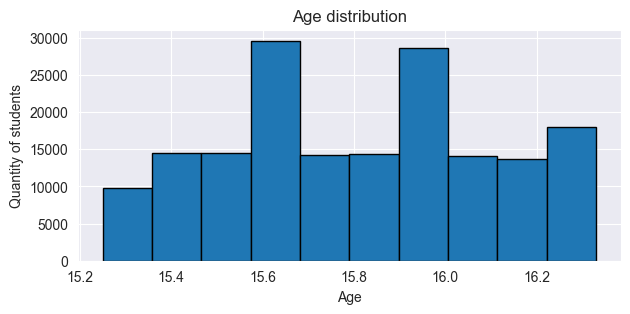

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 3))
plt.hist(student["AGE"], bins=10, edgecolor='black')
plt.title("Age distribution")
plt.ylabel("Quantity of students")
plt.xlabel("Age")
plt.show()


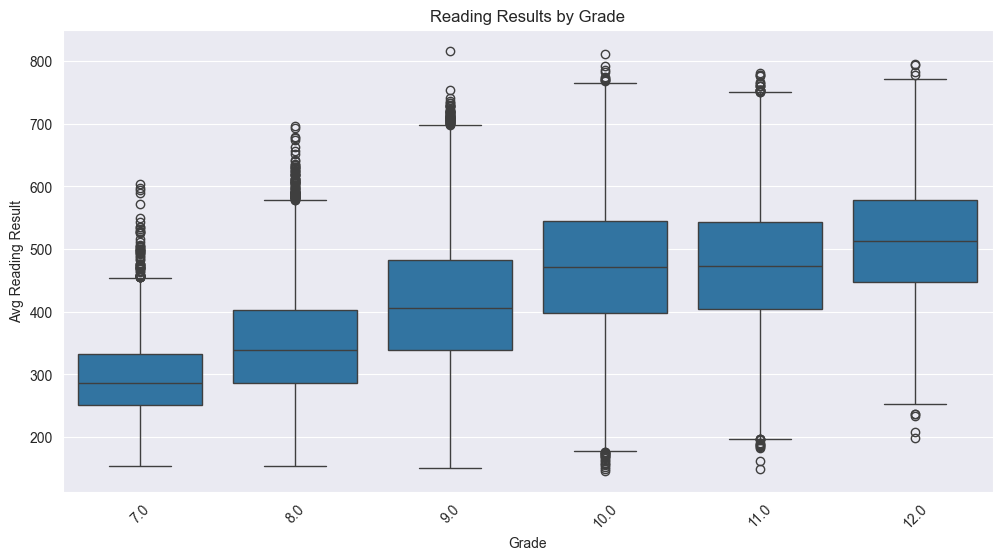

In [23]:
# 11. Relação entre Age_Category e Weight_(kg)
plt.figure(figsize=(12, 6))
# do not include non grade values
sns.boxplot(x='ST001D01T', y="Avg Reading Result", data=student[~student['ST001D01T'].between(90, 100)])
plt.title("Reading Results by Grade")
plt.xlabel("Grade")
plt.ylabel("Avg Reading Result")
plt.xticks(rotation=45)
plt.show()

It is also essential to examine the correlation between all dataset features and the target variable (Avg Reading Result). This helps identify which features are strongly associated with students performance and can be considered in the next step for feature selection.

We computed this correlation, and the top 20 features were visualized in a table.

In [24]:
correl = (
    student.corr(numeric_only=True)["Avg Reading Result"]
    .abs()
    .sort_values(ascending=False)
)

Correlation top features based on "Avg Reading Result"

In [25]:
top_corr = correl.drop("Avg Reading Result").head(30)

top_corr_df = top_corr.reset_index()

top_corr_df["Description"] = top_corr_df["index"].map(lambda code: data_map.map_enum[code].value if code in data_map.map_enum.__members__ else "Description not found")

top_corr_df.columns = ["Feature", "Correlation with Reading Result", "Description"]
display(top_corr_df)


,Feature,Correlation with Reading Result,Description
0,Reading Score Classification,0.880186,Description not found
1,Reading Score Category,0.799309,Description not found
2,PA042Q01TA,0.447538,What is your annual household income?
3,METASPAM,0.444451,Meta-cognition: assess credibility
4,HOMEPOS,0.416171,Home possessions (WLE)
5,METASUM,0.412880,Meta-cognition: summarising
6,PISADIFF,0.405946,Perception of difficulty of the PISA test (WLE)
7,ESCS,0.402658,"Index of economic, social and cultural status"
8,ST013Q01TA,0.389489,How many books are there in your home?
9,PA041Q01TA,0.371457,"In the last twelve months, about how much woul..."


**Correlation of reading by score category**

Correlation only for students in "Best performance (70-100%)" category

In [26]:
correl = student[student["Reading Score Category"] == 2].corr(numeric_only=True)["Avg Reading Result"].abs().sort_values(ascending=False)
top_corr = correl.drop("Avg Reading Result").head(20)
top_corr_df = top_corr.reset_index()
top_corr_df["Description"] = top_corr_df["index"].map(lambda code: data_map.map_enum[code].value if code in data_map.map_enum.__members__ else "Description not found")
top_corr_df.columns = ["Feature", "Correlation with Reading Result", "Description"]
display(top_corr_df)

#plt.figure(figsize=(14,14))
#sns.heatmap(corr);

,Feature,Correlation with Reading Result,Description
0,FL164Q02HA,0.308318,"School lessons in the last 12 months, have you..."
1,FL156Q05TA,0.275145,Do you get money from any of these sources? Oc...
2,FL150Q01TA,0.250011,Learned how to manage your money in a course: ...
3,FL164Q16HA,0.244669,"School lessons in the last 12 months, have you..."
4,FL164Q04HA,0.237218,"School lessons in the last 12 months, have you..."
5,FL164Q18HA,0.236891,"School lessons in the last 12 months, have you..."
6,FL168Q05HA,0.223618,In the last 12 months: Undertook voluntary work
7,FL153Q03HA,0.219247,"Get information about money matters (spending,..."
8,FL166Q03HA,0.190263,Encountered in a school lesson in the last 12 ...
9,WB031Q01NA,0.190215,"This school year, on average, on how many days..."


Correlation only for students in "Neutral performance (50-69%)" category


In [27]:
correl = student[student["Reading Score Category"] == 0].corr(numeric_only=True)["Avg Reading Result"].abs().sort_values(ascending=False)
top_corr = correl.drop("Avg Reading Result").head(20)
top_corr_df = top_corr.reset_index()
top_corr_df["Description"] = top_corr_df["index"].map(lambda code: data_map.map_enum[code].value if code in data_map.map_enum.__members__ else "Description not found")
top_corr_df.columns = ["Feature", "Correlation with Reading Result", "Description"]
display(top_corr_df)

,Feature,Correlation with Reading Result,Description
0,Reading Score Classification,0.870099,Description not found
1,EC154Q01IA,0.317045,Do you currently attend additional instruction...
2,GRADE,0.310901,Grade compared to modal grade in country
3,ST012Q05NA,0.307539,How many in your home: <Cell phones> with Inte...
4,PA042Q01TA,0.306737,What is your annual household income?
5,ST127Q01TA,0.301497,Have you ever repeated a <grade>? At <ISCED 1>
6,IC008Q08TA,0.298784,Use digital devices outside of school: Browsin...
7,ST176Q02IA,0.292861,How often involved in: <Chat on line> (e.g. <W...
8,REPEAT,0.292550,Grade Repetition
9,WB173Q03HA,0.292304,How did you feel the last time you spent time ...


Correlation only for students in "Worst performance (0-49%)" category (by worst avg)

In [28]:
correl = student[student["Reading Score Category"] == "Insufficient (0-49%)"].corr(numeric_only=True)["Avg Reading Result"].abs().sort_values(ascending=True)
top_corr = correl.drop("Avg Reading Result").head(20)
top_corr_df = top_corr.reset_index()
top_corr_df["Description"] = top_corr_df["index"].map(lambda code: data_map.map_enum[code].value if code in data_map.map_enum.__members__ else "Description not found")
top_corr_df.columns = ["Feature", "Correlation with Reading Result", "Description"]
display(top_corr_df)

,Feature,Correlation with Reading Result,Description
0,CNTRYID,NaN,Country Identifier
1,CNTSCHID,NaN,Intl. School ID
2,CNTSTUID,NaN,Intl. Student ID
3,OECD,NaN,OECD country
4,ADMINMODE,NaN,Mode of Respondent
5,LANGTEST_QQQ,NaN,Language of Questionnaire
6,LANGTEST_COG,NaN,Language of Assessment
7,LANGTEST_PAQ,NaN,Language of Assessment (PAQ)
8,BOOKID,NaN,Form Identifier
9,ST001D01T,NaN,Student International Grade (Derived)


Due to some categories being NaN, instead of comparing with student score, in the next section we're comparing by classification (meaning for example the best 10% of students are very good, instead of students with score between 900 and 1000)

Correlation only for students in "Best Performance (70-100%)" classification

In [29]:
correl = student[student["Reading Score Classification"]==2].corr(numeric_only=True)["Avg Reading Result"].abs().sort_values(ascending=False)

top_corr = correl.drop(["Avg Reading Result"]).head(20)

# Convert to DataFrame
top_corr_df = top_corr.reset_index()
top_corr_df.columns = ["Feature", "Correlation with Reading Result"]


top_corr_df["Description"] = top_corr_df["Feature"].map(lambda code: data_map.map_enum[code].value if code in data_map.map_enum.__members__ else "Description not found")
top_corr_df.columns = ["Feature", "Correlation with Reading Result", "Description"]
display(top_corr_df)

,Feature,Correlation with Reading Result,Description
0,WB173Q03HA,0.261879,How did you feel the last time you spent time ...
1,GRADE,0.254019,Grade compared to modal grade in country
2,ST176Q02IA,0.253259,How often involved in: <Chat on line> (e.g. <W...
3,ST127Q01TA,0.245047,Have you ever repeated a <grade>? At <ISCED 1>
4,WB171Q03HA,0.240049,Now think of the last time you had a break bet...
5,WB171Q02HA,0.238677,Now think of the last time you had a break bet...
6,WB173Q01HA,0.234630,How did you feel the last time you spent time ...
7,ST038Q07NA,0.229484,"During the past 12 months, how often: I got hi..."
8,EC154Q01IA,0.229182,Do you currently attend additional instruction...
9,ST012Q05NA,0.228788,How many in your home: <Cell phones> with Inte...


Correlation only for students in "Neutral performance (50-69%)" classification

In [30]:
correl = student[student['Reading Score Classification'] == 1].corr(numeric_only=True)["Avg Reading Result"].abs().sort_values(ascending=False)
top_corr = correl.drop("Avg Reading Result").head(20)
top_corr_df = top_corr.reset_index()
top_corr_df["Description"] = top_corr_df["index"].map(lambda code: data_map.map_enum[code].value if code in data_map.map_enum.__members__ else "Description not found")
top_corr_df.columns = ["Feature", "Correlation with Reading Result", "Description"]
display(top_corr_df)

,Feature,Correlation with Reading Result,Description
0,PA041Q01TA,0.100768,"In the last twelve months, about how much woul..."
1,PA161Q01HA,0.099233,How often are you involved in reading activiti...
2,PA042Q01TA,0.099190,What is your annual household income?
3,HOMEPOS,0.098348,Home possessions (WLE)
4,METASUM,0.097097,Meta-cognition: summarising
5,ESCS,0.091694,"Index of economic, social and cultural status"
6,METASPAM,0.087319,Meta-cognition: assess credibility
7,PISADIFF,0.085507,Perception of difficulty of the PISA test (WLE)
8,OECD,0.084533,OECD country
9,ST223Q08HA,0.082302,Teachers inyour school: They have lower academ...


Correlation only for students in "Worst performance (0-49%)" classification


In [31]:
correl = student[student['Reading Score Classification'] == 0].corr(numeric_only=True)["Avg Reading Result"].abs().sort_values(ascending=False)
top_corr = correl.drop("Avg Reading Result").head(20)
top_corr_df = top_corr.reset_index()
top_corr_df["Description"] = top_corr_df["index"].map(lambda code: data_map.map_enum[code].value if code in data_map.map_enum.__members__ else "Description not found")
top_corr_df.columns = ["Feature", "Correlation with Reading Result", "Description"]
display(top_corr_df)

,Feature,Correlation with Reading Result,Description
0,Reading Score Category,0.744547,Description not found
1,METASPAM,0.361773,Meta-cognition: assess credibility
2,ST166Q03HA,0.316441,How appropriate in reaction to this email: Cli...
3,PISADIFF,0.298904,Perception of difficulty of the PISA test (WLE)
4,ST013Q01TA,0.285929,How many books are there in your home?
5,ST163Q02HA,0.281140,"In the PISA test, how do you feel about the re..."
6,ST163Q03HA,0.259376,"In the PISA test, how do you feel about the re..."
7,ST196Q02HA,0.248366,How easy to perform on your own: Explain how c...
8,ESCS,0.247015,"Index of economic, social and cultural status"
9,PA042Q01TA,0.246789,What is your annual household income?


Top correlations for Portugal and Spain

In [32]:
correl = (
    student[student['CNT'].isin(["b'PRT'", "b'PRT'"])].corr(numeric_only=True)["Avg Reading Result"]
    .abs()
    .sort_values(ascending=False)
)

In [33]:
top_corr = correl.drop("Avg Reading Result").head(30)

top_corr_df = top_corr.reset_index()

top_corr_df["Description"] = top_corr_df["index"].map(lambda code: data_map.map_enum[code].value if code in data_map.map_enum.__members__ else "Description not found")

top_corr_df.columns = ["Feature", "Correlation with Reading Result", "Description"]
display(top_corr_df)


,Feature,Correlation with Reading Result,Description
0,Reading Score Classification,0.845339,Description not found
1,Reading Score Category,0.819034,Description not found
2,GRADE,0.624075,Grade compared to modal grade in country
3,REPEAT,0.579339,Grade Repetition
4,ISCEDL,0.574237,ISCED level
5,METASUM,0.529322,Meta-cognition: summarising
6,ST127Q01TA,0.523559,Have you ever repeated a <grade>? At <ISCED 1>
7,ST165Q04IA,0.511151,Usefulness for writing a summary: I carefully ...
8,METASPAM,0.510751,Meta-cognition: assess credibility
9,ST225Q06HA,0.509642,Do you expect to complete? <ISCED level 5A or 6>


### Categorical Values analysis

Regarding the categorical values, there are a few of them that are country specific. Since this study focuses on identifying global trends, we chose not to include these variables in our analysis.

Country specific codes:

Additionally, the codes "CNT", "NatCen", "PROGN", "STRATUM" and "SUBNATION" are all related to the student's country/region. To reduce the dimensionality of the dataset, we decided to retain only "CNT", as it effectively aggregates the information from the others.

"COBN_S", "COBN_M" and "COBN_F" represent the country of birth of the student, mother and father, respectively. This were excluded to avoid increasing the dimensionality with features that are strongly correlated with "CNT".

"OCOD1", "OCOD2" and "OCOD3" represent the occupation of the student, mother and father. While potentially insightful, occupational data can be highly country-dependent due to cultural and economic differences. For this reason, we chose not to include them in the current analysis.

The "VER_DAT" was removed, as it only contains the questionnaire date, which is not relevant to our study, "CYC" contains the dataset cycle, in this study we are only analysing 2018 dataset so we can remove it to the PV{i}MATH, PV{i}READ, PV{i}SCIE" can be average and we can remove the scales, weights used for PISA calculations, we can remove, since we're analysing against those results "W_FSTUWT", "W_FSTURWT{i}","i", "SENWT", "WVARSTRR", "UNIT", we can also remove other features unrelated withh performance like the Form Identifier "BOOKID", language of Questionnaire and assessment "LANGTEST_QQQ", "LANGTEST_COG" and LANGTEST_PAQ, and also remove the Mode of respondent "ADMINMODE"



## 2.4 Verify data quality

In this step we started by checking missing values in the dataset.

We've decided that variables with more than 80% missing data can lead to biased results, so they should be removed from the dataset in the future.

In [34]:
print("\n--- Missing Values ---")
missing = student.isnull().mean().sort_values(ascending=False)
print(missing[missing > 0.8])


--- Missing Values ---
EC162Q08HA      0.935648
EC162Q07HA      0.930701
EC162Q06HA      0.930666
EC162Q04HA      0.929814
EC162Q05HA      0.929552
EC162Q02HA      0.929050
EC162Q03HA      0.928916
EC162Q01HA      0.927574
ST021Q01TA      0.898697
LANGSIBLINGS    0.855254
LANGFRIEND      0.849291
LANGFATHER      0.848486
LANGSCHMATES    0.848020
LANGMOTHER      0.843726
EC012Q01NA      0.822065
EC012Q12NA      0.822065
EC012Q13HA      0.822065
EC012Q08NA      0.822065
EC012Q02NA      0.822065
EC012Q04NA      0.822065
EC012Q06NA      0.822065
EC012Q07NA      0.822065
PA018Q02NA      0.814849
dtype: float64


We've also done a sanity check to see if there were any duplicated rows or columns, but there were no cases in this dataset.

In [35]:
print("\n--- Duplicated Rows ---")
duplicated_rows = student.duplicated().sum()
print(f"Duplicated rows: {duplicated_rows}")

print("\n--- Duplicated Columns ---")
duplicated_columns = student.T.duplicated().sum()
print(f"Duplicated columns: {duplicated_columns}")


--- Duplicated Rows ---
Duplicated rows: 0

--- Duplicated Columns ---
Duplicated columns: 0
